In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
from util import *

df = pd.read_parquet("../data/preprocessed.parquet")

## Not normalized
ie you have overall outage counts, no proportions

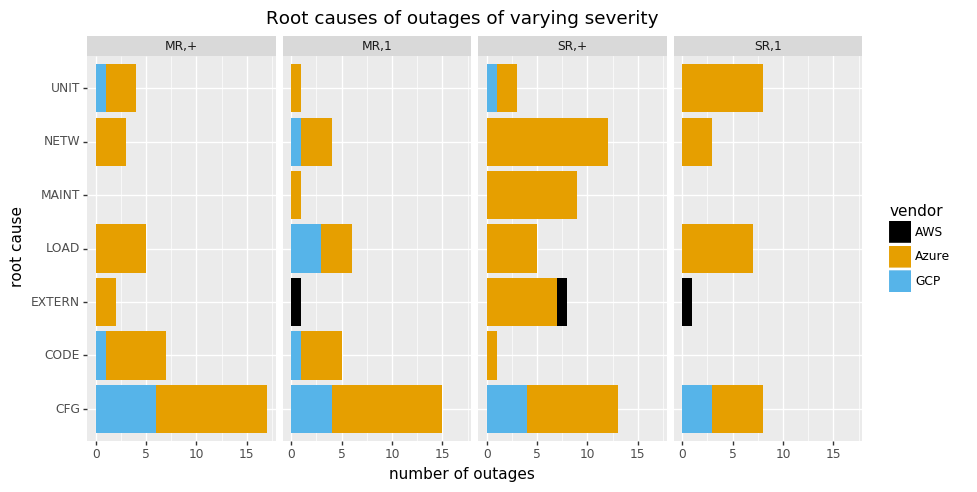

<ggplot: (308089641)>

In [4]:
# Removing single availability zone because only applies to AWS
subdf = df[['range', 'services', 'vendor', 'cause', 'cause_broader']]

filt = subdf[filter_notprovided(subdf.cause) & filter_notprovided(subdf.range) & filter_notprovided(subdf.services)]

plotdf = pd.DataFrame({'range_services': filt[['range', 'services']].applymap(shorten).agg(','.join, axis=1),
                       'cause_broader': filt.cause_broader.map(shorten),
                       'vendor': filt.vendor})

(p9.ggplot(plotdf)
 + p9.aes(x='cause_broader', fill='vendor') 
#  + p9.geom_col(position='position_dodge')
 + p9.geom_bar()
 + p9.coord_flip()
 + p9.theme(figure_size=(10,5))
 + disc_fillpalette
 + p9.facet_grid("~ range_services")
 + p9.labs(y="number of outages", x="root cause")
 + p9.ggtitle("Root causes of outages of varying severity"))

## Normalized by vendor & range
ie for each vendor, bars in each facet sum to 1

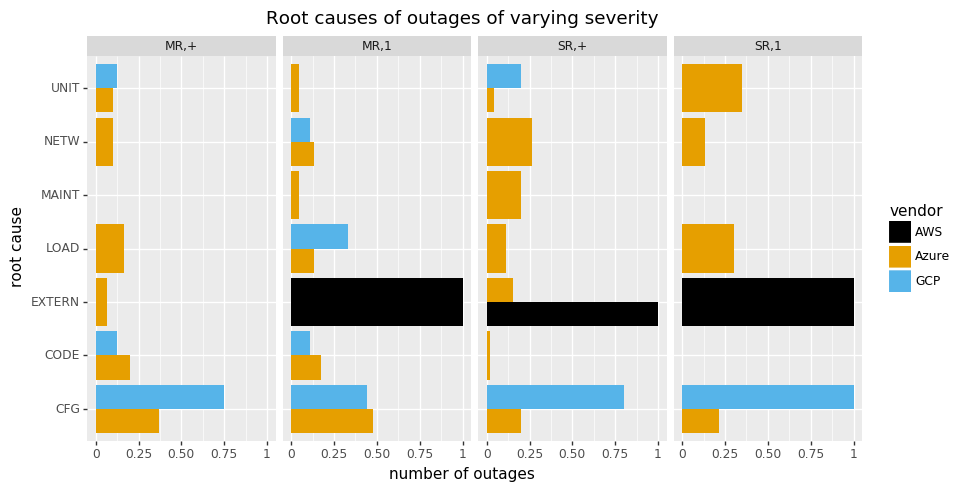

<ggplot: (305423989)>

In [2]:
# Removing single availability zone because only applies to AWS
subdf = df[['range', 'services', 'vendor', 'cause', 'cause_broader']]

filt = subdf[filter_notprovided(subdf.cause) & filter_notprovided(subdf.range) & filter_notprovided(subdf.services)]

plotdf = pd.DataFrame({'range_services': filt[['range', 'services']].applymap(shorten).agg(','.join, axis=1),
                       'cause_broader': filt.cause_broader.map(shorten),
                       'vendor': filt.vendor}).groupby(['vendor', 'range_services']).cause_broader.value_counts(normalize=True).reset_index(name='proportion')

(p9.ggplot(plotdf)
 + p9.aes(x='cause_broader', y='proportion', fill='vendor') 
 + p9.geom_col(position='position_dodge')
 + p9.coord_flip()
 + p9.theme(figure_size=(10,5))
 + disc_fillpalette
 + p9.facet_grid("~ range_services")
 + p9.labs(y="number of outages", x="root cause")
 + p9.ggtitle("Root causes of outages of varying severity"))